<a href="https://colab.research.google.com/github/onkararj/Projects/blob/main/NLP_CORONA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk import word_tokenize
from nltk.corpus import stopwords
import re 
import string
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Datasets-20220611T024242Z-001/Datasets/Corona_NLP_test.csv",encoding="latin-1")
df.head

<bound method NDFrame.head of       UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1     When I couldn't find hand sanitizer at Fred Me...  

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


Now droping duplicates entries.


In [ ]:
df.drop_duplicates(inplace=True)

Now removing username and screenname column because they are for unique identity they will not affect our model.

In [ ]:
df.drop(['UserName', 'ScreenName'], axis=1, inplace=True)

checking the number of missing values

In [ ]:
print(df.isnull().sum())

Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


In [ ]:
print(df.Location.value_counts(normalize= True, dropna= False)[:30] *100)

NaN                        21.958926
United States               1.974724
London, England             1.263823
Washington, DC              1.000527
New York, NY                0.895208
Los Angeles, CA             0.868878
Toronto, Ontario            0.763560
Canada                      0.763560
California, USA             0.684571
London                      0.658241
Toronto                     0.552923
USA                         0.526593
Atlanta, GA                 0.500263
San Francisco, CA           0.500263
United Kingdom              0.473934
Texas, USA                  0.447604
Ireland                     0.447604
New York, USA               0.421274
Los Angeles                 0.421274
Chicago, IL                 0.394945
India                       0.394945
UK                          0.368615
Ontario, Canada             0.342285
MontrÃ©al, QuÃ©bec          0.315956
New York City               0.315956
Austin, TX                  0.289626
Australia                   0.289626
W

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df.Location = df.Location.str.split(',').str[0]

In [ ]:
df.Location = df.Location.str.split(',').str[0]

df["Sentiment"] = df["Sentiment"].str.replace("Extremely Negative", "Negative")
df["Sentiment"] = df["Sentiment"].str.replace("Extremely Positive", "Positive")

df['Sentiment'] = df.Sentiment.str.replace('Extremely Positive', 'Positive')
df['Sentiment'] = df.Sentiment.str.replace('Extremely Negative', 'Negative')

In [ ]:
#Exploratory Data Analysis
#sentiment
print(df.Sentiment.value_counts(),'\n')
print(df.Sentiment.value_counts(normalize=True) * 100)

Negative    1633
Positive    1546
Neutral      619
Name: Sentiment, dtype: int64 

Negative    42.996314
Positive    40.705635
Neutral     16.298052
Name: Sentiment, dtype: float64


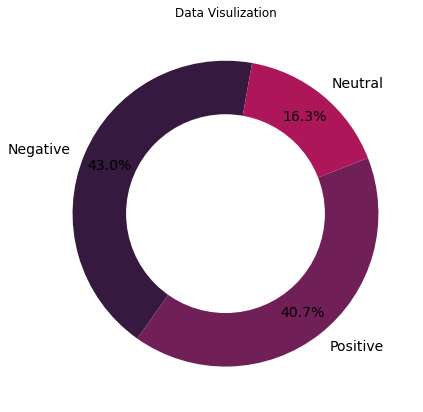

In [ ]:
# plot of tweet sentiment distribution
plt.figure(figsize=(6,6))

sentiments = df.Sentiment.value_counts()

sns.set_palette("rocket")
plt.pie(sentiments,
        labels= sentiments.index,
        autopct='%1.1f%%', startangle=80, 
        pctdistance=0.82, textprops={"fontsize": 14})

centreCircle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)

plt.tight_layout()
plt.title("Data Visulization")

plt.show()

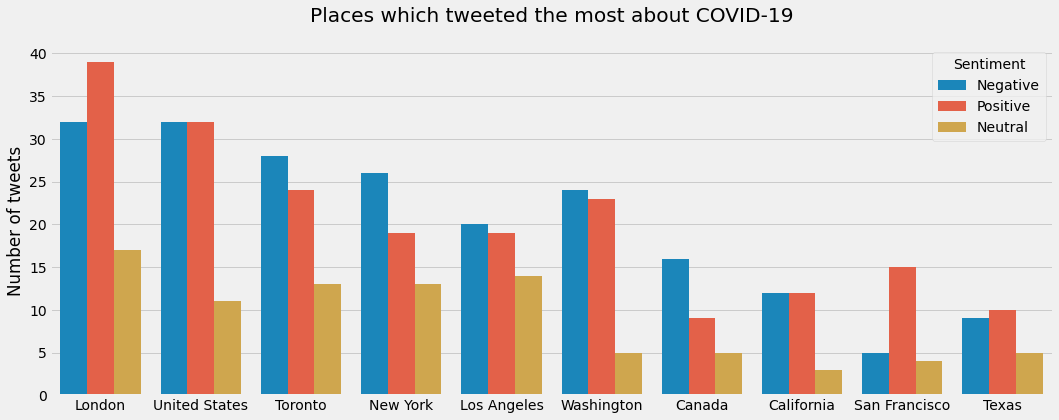

In [ ]:
# plot of top cities/countries
plt.style.use("fivethirtyeight")

plt.figure(figsize=(16, 6))
location = sns.countplot(x= 'Location', data= df, hue="Sentiment", order=df.Location.value_counts()[:10].index)
location.set_title("Places which tweeted the most about COVID-19", y=1.05)

def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

axis_labels(location)

plt.show()

In [ ]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

# create day of the week and month columns
df['day'] = df['TweetAt'].dt.dayofweek
df['month'] = df['TweetAt'].dt.month

days = {0: 'Monday', 1: 'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
months = {0: 'January ', 1: 'February', 2:'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July',
      7:'August', 8:'September', 9: 'October', 10: 'November', 11: 'December'  }

df["day"] = df["day"].map(days)
df["month"] = df["month"].map(months)

In [ ]:
print(f"First tweet: {df['TweetAt'].dt.date.min()}, Last tweet: {df['TweetAt'].dt.date.max()}")

First tweet: 2020-02-03, Last tweet: 2020-12-03


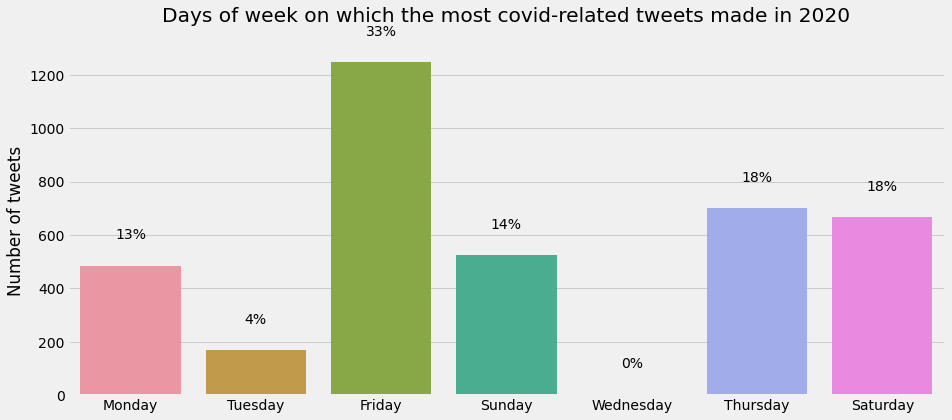

In [ ]:
plt.figure(figsize=(14, 6))
days = sns.countplot(x="day", data=df)
days.set_title("Days of week on which the most covid-related tweets made in 2020", 
                                             y=1.05)

def add_labels(ax, space):
    for rect in ax.patches:
        width = rect.get_width()
        height = rect.get_height()
        total = df.shape[0]
        
        ax.text(rect.get_x() + width/2,
               height + space,
               '{}%'.format(int(np.round(height/total*100))),
                ha="center")

add_labels(days, 100)
axis_labels(days)
plt.show()



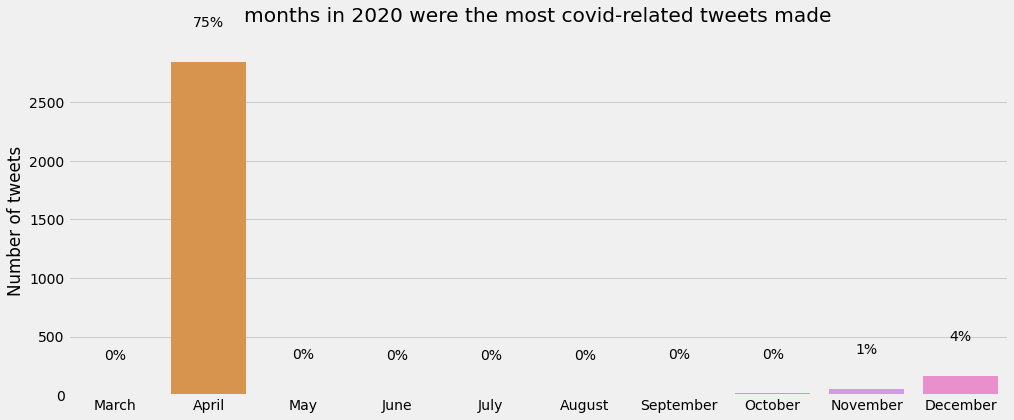

In [ ]:
plt.figure(figsize=(15, 6))
months = sns.countplot(df['month'])
months.set_title("months in 2020 were the most covid-related tweets made", 
                                             y=1.05)

add_labels(months, 300)
axis_labels(months)
plt.show()

In [ ]:
def tweets(df, n, col_name="OriginalTweet"):
    for tweet_no, tweet in enumerate(df[col_name][:n]):
        print(tweet_no+1, tweet, '\n')
        print("*" * 60, '\n')
        
tweets(df, 10)

1 TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1 

************************************************************ 

2 When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY 

************************************************************ 

3 Find out how you can protect yourself and loved ones from #coronavirus. ? 

************************************************************ 






#Election2020 #CDC https://t.co/29isZOewxu 

************************************************************ 

5 #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder 

In [ ]:
# combine train and test dataframes
combined = pd.concat([df], ignore_index= True)

# select relevant features: tweet and Sentiments
combined = combined.loc[:, ["OriginalTweet", "Sentiment"]]

# load stop words
stop_word = stopwords.words('english')

def clean_tweet(text):
    text = re.sub(r"#\w+", " ", text)            # remove hashtags
    text = re.sub(r"@\w+", " ",text)             # remove mentions
    text = re.sub(r"http\S+", " ", text)         # remove urls
    text = re.sub(r"[^a-zA-Z]", " ", text)        # remove non-words (digits, punctuations etc)
    text = text.lower().strip()                  # convert tweet to lowercase and strip
    
    text = " ".join([word for word in text.split() if not word in stop_word])           # remove stop words    
    
    text = " ".join(nltk.word_tokenize(text))           # tokenize text
      
    return text

# clean OriginalTweet and assign the data to an new "tweet" column
combined['tweet'] = combined['OriginalTweet'].apply(lambda x: clean_tweet(x))

In [ ]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

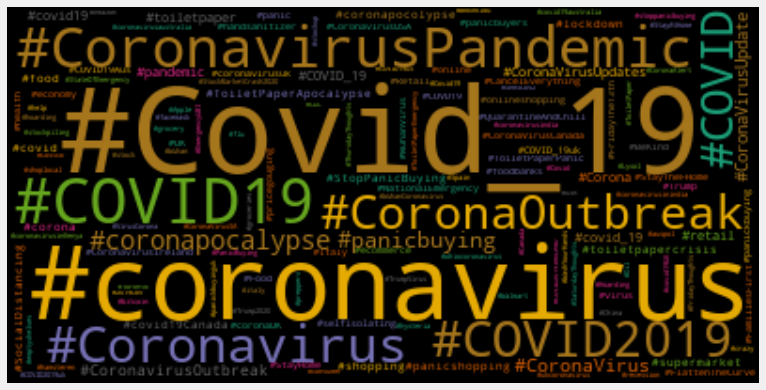

In [ ]:
def create_wordCloud(pattern):
    """create word cloud visualization
    
    arguments:
        pattern (str): regex pattern to extract certain text from the data
    """
    data = df["OriginalTweet"].str.extractall(pattern)[0].value_counts()

    data.index = data.index.map(str)                                                       # convert data index to string
    data_wc = WordCloud(max_words = 500, colormap='Dark2_r', 
                        background_color='black').generate_from_frequencies(data)          # generate word cloud

    
    # display the cloud
    fig = plt.figure()
    fig.set_figwidth(12) # set width
    fig.set_figheight(12) # set height

    plt.imshow(data_wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
# create word cloud of the most frequently used hashtags
hashtag = r"(#\w+)"
create_wordCloud(hashtag)

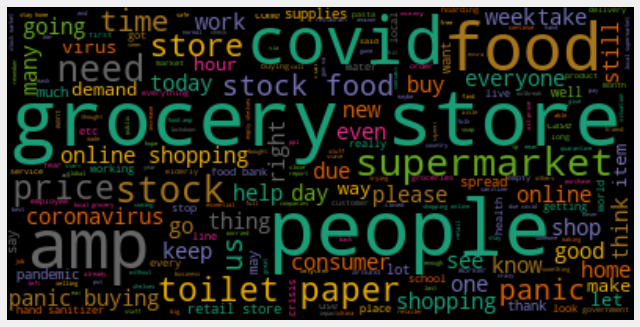

In [ ]:
# most common words in our tweet data
corpus = ",".join(word for word in combined.tweet)
stopwords = set(STOPWORDS)
tweet_wc = WordCloud(max_words = 500, colormap='Dark2_r', 
                        background_color='black', stopwords=stopwords).generate(corpus)   

# display the cloud
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(tweet_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def cleantext(text):
  #step1-: lower & tokenization
  tokens = word_tokenize(text.lower())

  #step2 -: filter out all the non alphabets
  ftoken = [t for t in tokens if(t.isalpha())]

  #step3 -: remove stopwords
  stopword = stopwords.words("english")
  ctoken = [t for t in ftoken if(t not in stopword)]

  #step4 -: lemmatization
  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(t) for t in ctoken]

  return " ".join(ltoken)

In [ ]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,day,month
0,NYC,2020-02-03,TRENDING: New Yorkers encounter empty supermar...,Negative,Monday,March
1,Seattle,2020-02-03,When I couldn't find hand sanitizer at Fred Me...,Positive,Monday,March
2,NaN,2020-02-03,Find out how you can protect yourself and love...,Positive,Monday,March
3,Chicagoland,2020-02-03,#Panic buying hits #NewYork City as anxious sh...,Negative,Monday,March
4,Melbourne,2020-03-03,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,Tuesday,April


In [ ]:
df["OriginalTweet"][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [ ]:
msg = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

In [ ]:
cleantext(msg)

In [ ]:
x = df.iloc[:, 2:]
y = df.iloc[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

ValueError: ignored